# Analysis of How the Environment factors and COVID-19 Influnece US Car Accidents

In this notebook, I will choose a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data.

I will take consideration of many environment factors that may have impact on the possibility of car accidents and use multiple visulization charts to make analysis. Besides, since COVID-19 spread duriong this chosen peroid, I will also analyze if car accidents number is related to COVID-19.

## Part1: Initial Eploration

In [1]:
# load necessary packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import pandasql as psql
import matplotlib.pyplot as plt

In [2]:
# load the data
df =pd.read_csv('US_Accidents.csv')

In [3]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<AxesSubplot:title={'center':'\n Missing Percentage of Data Metrics \n'}, xlabel='\n Missing Percentage\n', ylabel='\n Data Metrics \n'>

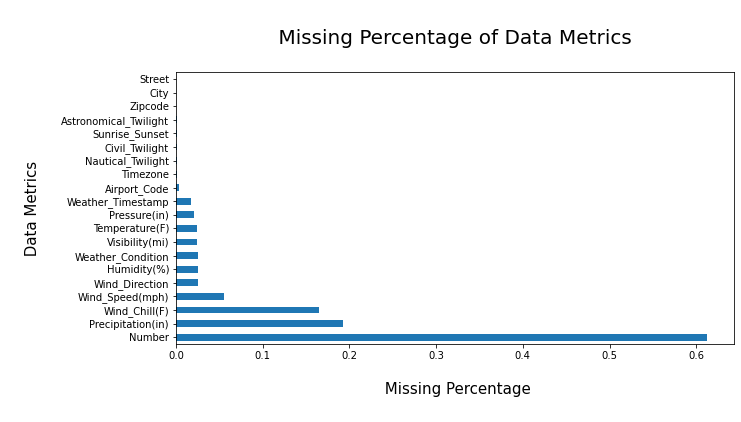

In [5]:
# check the percentage of missing data in different columns
plt.figure(figsize=(10,5))
plt.title('\n Missing Percentage of Data Metrics \n', size=20)
plt.ylabel('\n Data Metrics \n', fontsize=15)
plt.xlabel('\n Missing Percentage\n', fontsize=15)
missing_percentage = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage[missing_percentage!=0].plot(kind='barh')

We can see column 'Number' has more than 60% missing data,'Wind_Chill' and 'Precipitation' have around 20% missing data. The rest of columns
miss less than 10% data. since 'Number' doesn't matter much in our analysis, we can move forward to our visulization.

Text(0, 0.5, 'Number of Cases')

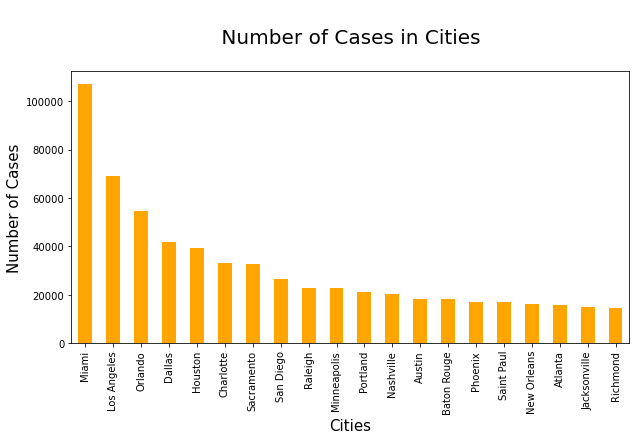

In [6]:
city_accidents= df.City.value_counts()
ax =city_accidents[:20].plot(kind='bar',title='\n Number of Cases in Cities \n',
                          figsize=(10,5),color='orange')
ax.title.set_size(20)
ax.set_xlabel("Cities",fontdict={'fontsize':15})
ax.set_ylabel("Number of Cases",fontdict={'fontsize':15})

Miami leaves other cities far behind in this statistic. Maybe you'll think about a question: Where is New York City?

In [7]:
"NY" in df.State

False

So you know why Miami leads instead of NYC. We don't have NYC data in our dataset.

<AxesSubplot:title={'center':'\n Accidents Distribution \n'}, xlabel='\n Number of Accidents\n', ylabel='\n Number of Cities \n'>

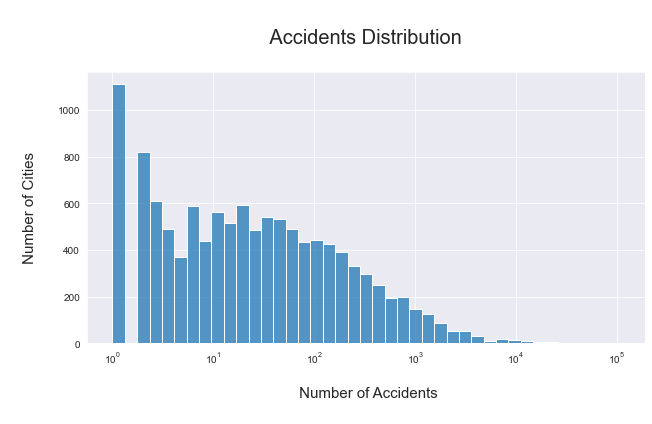

In [8]:
# Check out the accidents distribution
sns.set_style('darkgrid')
high_accident_cities = city_accidents[city_accidents>=1000] 
low_accident_cities = city_accidents[city_accidents<1000] 
len(high_accident_cities)/len(city_accidents)

plt.figure(figsize = (10,5))
plt.title('\n Accidents Distribution \n', size=20)
plt.ylabel('\n Number of Cities \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
sns.histplot(city_accidents,log_scale=True)


<AxesSubplot:title={'center':'\n Dangerous Cities Accidents Distribution \n'}, xlabel='\n Number of Accidents\n', ylabel='\n Number of Cities \n'>

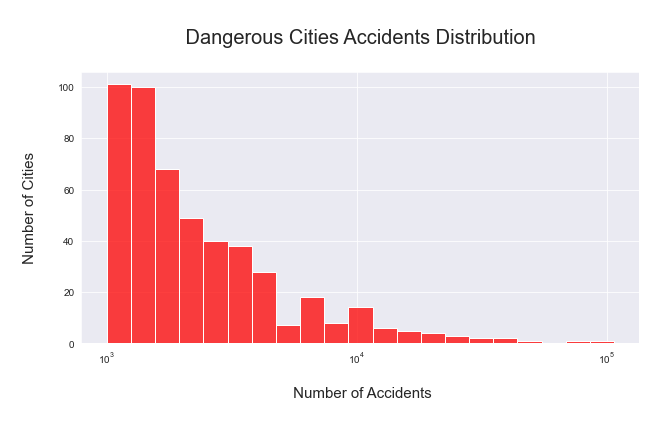

In [9]:
plt.figure(figsize = (10,5))
plt.title('\n Dangerous Cities Accidents Distribution \n', size=20)
plt.ylabel('\n Number of Cities \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
sns.histplot(high_accident_cities,log_scale=True,color='red')

<AxesSubplot:title={'center':'\n Safe Cities Accidents Distribution \n'}, xlabel='\n Number of Accidents\n', ylabel='\n Number of Cities \n'>

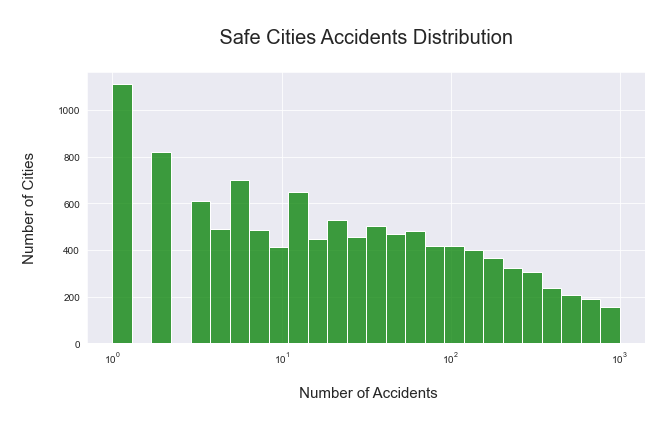

In [10]:
plt.figure(figsize = (10,5))
plt.title('\n Safe Cities Accidents Distribution \n', size=20)
plt.ylabel('\n Number of Cities \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
sns.histplot(low_accident_cities,log_scale=True,color='green')

I define city whose number of accidents lower than 1000 each year as safe city and city whose number of accidents higher than 1000 each year as dangerous city.
We can see through these three distribution plots that the number of extremely dangerous city is relatively small and the number of safe cities is much more. And there are even more than 1000 cities only have 1 accident during these years.

## Part2: Data Cleaning

After initial exploration, we can start cleaning the data and getting prepared for our analysis.
Since I'm only interested in how environmental factors and COVID-19 affect the traffic, We will only keep the following columns: ID, Start_Time, Start_Lat, Start_Lng, City, Temperature(F), Wind_Speed(mph), Humidity(%), Precipitation(in), Visibility(mi), Weather_Condition and drop the remaining columns for cleaner analysis. 

In [11]:
df= df.drop(columns=["End_Time","End_Lat",'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street','Side', 'County', 'State', 'Zipcode', 'Country', 'Timezone','Airport_Code', 'Weather_Timestamp', 'Wind_Chill(F)', 'Pressure(in)', 'Wind_Direction','Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'])

In [13]:
#Check out the null values and try to replace them
print(df.isnull().sum())

ID                        0
Severity                  0
Start_Time                0
Start_Lat                 0
Start_Lng                 0
City                    137
Temperature(F)        69274
Humidity(%)           73092
Visibility(mi)        70546
Wind_Speed(mph)      157944
Precipitation(in)    549458
Weather_Condition     70636
dtype: int64


<AxesSubplot:title={'center':'\n Distribution of Accidents Temperatue  \n'}, xlabel='\n Temperature(F) \n', ylabel='\n Density \n'>

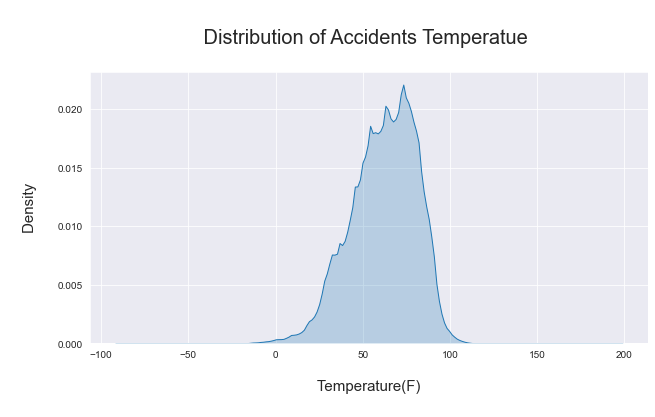

In [14]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Temperatue  \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)
sns.kdeplot(data=df["Temperature(F)"],shade=True)

<AxesSubplot:title={'center':'\n Distribution of Accidents Visibility \n'}, xlabel='\n Visibility(mi)\n', ylabel='\n Density \n'>

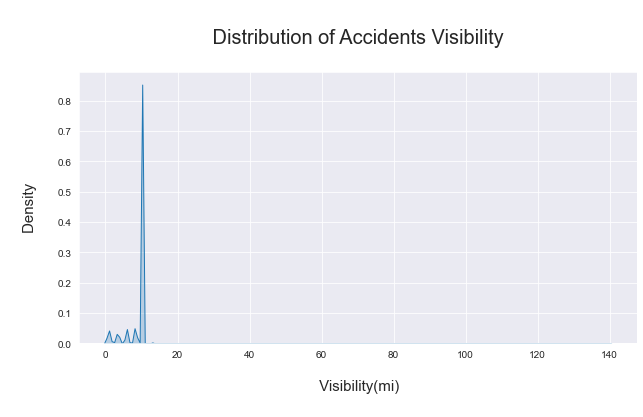

In [15]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Visibility \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Visibility(mi)\n', fontsize=15)
sns.kdeplot(data=df["Visibility(mi)"],shade=True)

Since temperature has less than 10% null values of the total number of values and they appear to be normally distributed. It might be a good idea to fill these empty data with the mean value. For Visibility(mi), it's right skewed. So replacing null values with a median value is more suitable.

In [17]:
df['Temperature(F)']=df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Visibility(mi)']=df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())

In [16]:
df["Weather_Condition"].value_counts()

Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

Since there are 127 types of weather condition and it's hard to differentiate and many of them can be consider as one big category. I decide to drop the column.

In [18]:
df=df.drop(columns=["Weather_Condition"])

/Users/moyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'\n Distribution of Accidents WindSpeed\n'}, xlabel='Wind_Speed(mph)'>

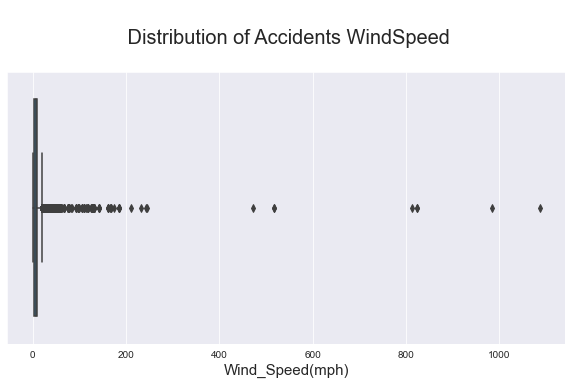

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('\n Distribution of Accidents WindSpeed\n', size=20)
plt.xlabel('\n Wind Speed (mph)\n', fontsize=15)
sns.boxplot(df["Wind_Speed(mph)"])

<AxesSubplot:title={'center':'\n Distribution of Accidents Precipitation \n'}, xlabel='\n Precipitation(in) \n', ylabel='\n Density \n'>

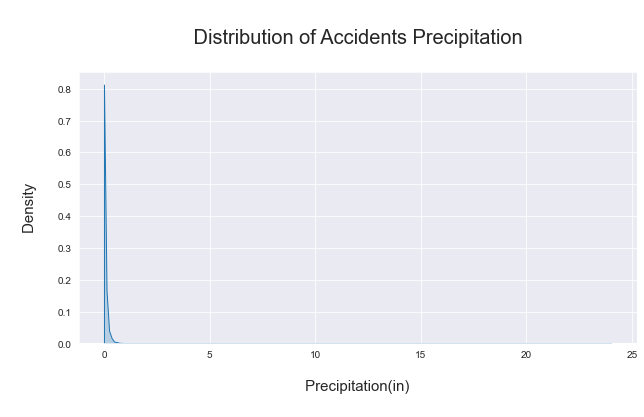

In [20]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Precipitation \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Precipitation(in) \n', fontsize=15)
sns.kdeplot(data=df["Precipitation(in)"],shade=True)

<AxesSubplot:title={'center':'\n Distribution of Accidents Humidity \n'}, xlabel='\n Humidity(%) \n', ylabel='\n Density \n'>

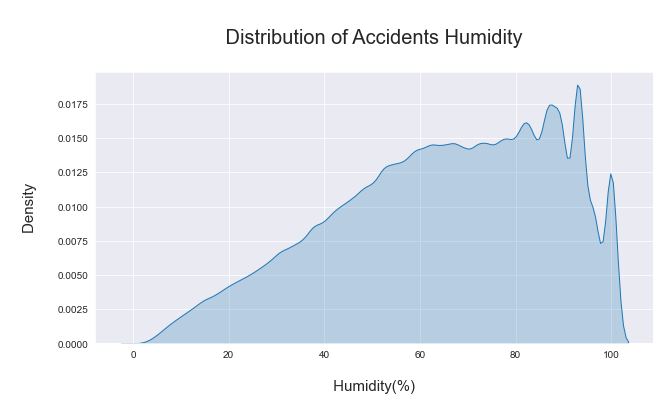

In [21]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Humidity \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Humidity(%) \n', fontsize=15)
sns.kdeplot(data=df["Humidity(%)"],shade=True)

We can see the plots of precipitation and windspeed are right skewed so it's better to use mode value to fill the Null value in these two columns. Humidity plot though has a left skwed distribution. I still used the mode value to fill out the Null. 

In [22]:
df['Precipitation(in)'].value_counts()
df["Wind_Speed(mph)"].value_counts()
df["Wind_Speed(mph)"].value_counts() ### 7.3950442026078775
df['Precipitation(in)'].mean() ### 0.007016939880237856
df["Wind_Speed(mph)"].isnull().sum() ### 157944
df["Precipitation(in)"].isnull().sum() ### 549458

549458

In [23]:
df['Precipitation(in)']=df['Precipitation(in)'].fillna(df['Precipitation(in)'].mode()[0])
df['Wind_Speed(mph)']=df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mode()[0])
df['Humidity(%)']=df['Humidity(%)'].fillna(df['Humidity(%)'].mode()[0])

In [24]:
df = df.dropna(axis=0)

In [25]:
df

,ID,Severity,Start_Time,Start_Lat,Start_Lng,City,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,Dublin,42.1,58.0,10.0,10.4,0.00
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,Dayton,36.9,91.0,10.0,0.0,0.02
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,Cincinnati,36.0,97.0,10.0,0.0,0.02
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,Akron,39.0,55.0,10.0,0.0,0.00
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,Cincinnati,37.0,93.0,10.0,10.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,86.0,40.0,10.0,13.0,0.00
2845338,A-2845339,2,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,70.0,73.0,10.0,6.0,0.00
2845339,A-2845340,2,2019-08-23 19:00:21,33.775450,-117.847790,Orange,73.0,64.0,10.0,10.0,0.00
2845340,A-2845341,2,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,71.0,81.0,10.0,8.0,0.00


## Part3: Data Analysis

### 1. Environment Factor Analysis

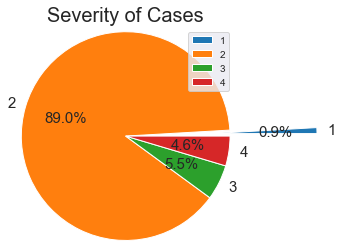

In [26]:
# Check out the severity of accidents
severity_pie = df.groupby('Severity').count()['ID'] ### group by severity in order to do circle map
mylabels = ["1", "2", "3", "4"]
plt.title("Severity of Cases",fontsize=20)
plt.pie(severity_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 15},radius=1.2,explode=(1,0,0,0))
plt.legend(mylabels, loc="best")

/Users/moyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'\n Case Reported for Temperature \n'}, xlabel='Temperature(F)', ylabel='\n Number of Accidents \n'>

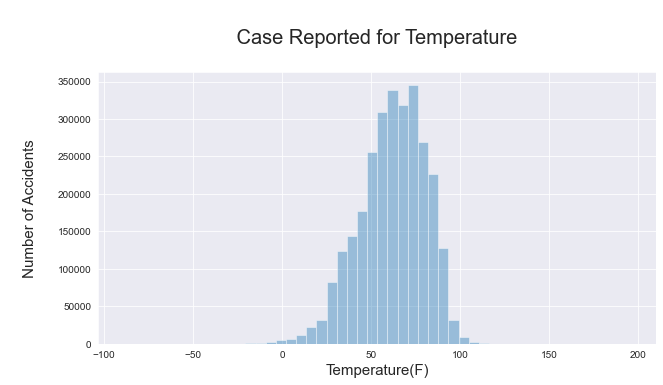

In [27]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Case Reported for Temperature \n', size=20)
plt.ylabel('\n Number of Accidents \n', fontsize=15)
plt.xlabel('\n Temperature(F)\n', fontsize=15)
sns.distplot(a=df["Temperature(F)"],kde=False) 

So then we can check if there is relationship between temperature and the severity of accidents.

<AxesSubplot:title={'center':'\n Relationship between Temperature and Severity \n'}, xlabel='Severity', ylabel='Temperature(F)'>

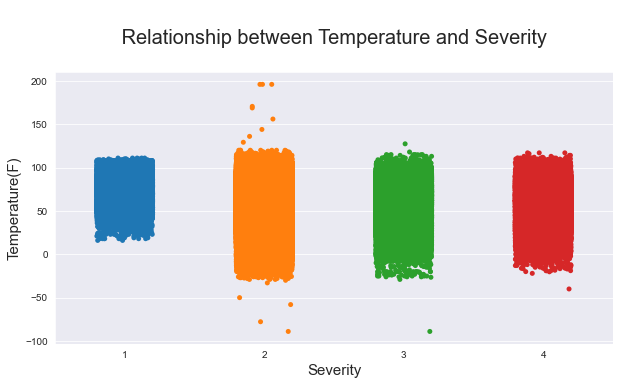

In [28]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Temperature and Severity \n', size=20)
plt.ylabel('\n Temperature(F) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Temperature(F)'],data=df,jitter=0.2)

Text(0.5, 35.80000000000002, '\n Severity \n')

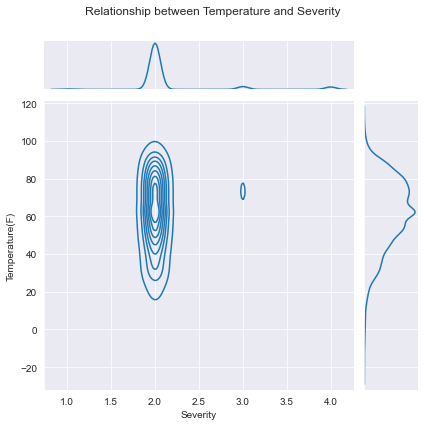

In [29]:
df_2 = df.sample(frac=0.01)
p=sns.jointplot(x=df_2["Severity"],y=df_2["Temperature(F)"],kind='kde')
p.fig.suptitle('Relationship between Temperature and Severity')
p.ax_joint.collections[0].set_alpha(0)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.9)
#plt.title('\n Relationship between Temperature and Severity \n', size=15)
#plt.title('Relationship between Temperature and Severity', y=1.5, fontsize = 15)
plt.ylabel('\n Temperature(F) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)

Text(0.5, 6.799999999999994, '\n Temperature(F) \n')

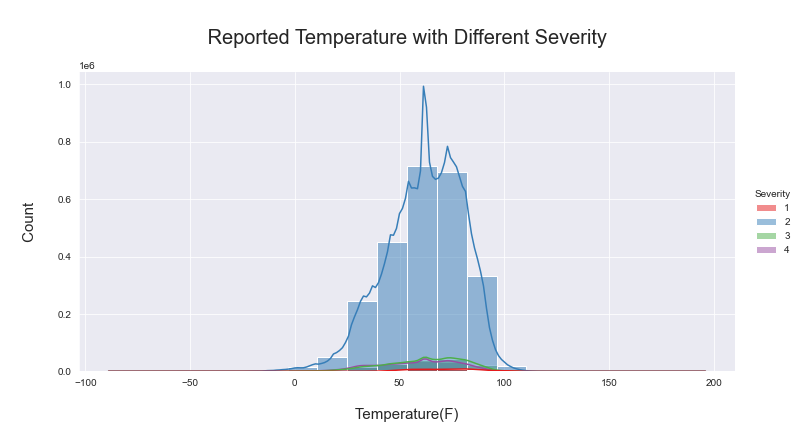

In [30]:
sns.displot(df, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Temperature with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)

Check out the relationship between humidity and severity.

<AxesSubplot:title={'center':'\n Relationship between Humidity and Severity \n'}, xlabel='Severity', ylabel='Humidity(%)'>

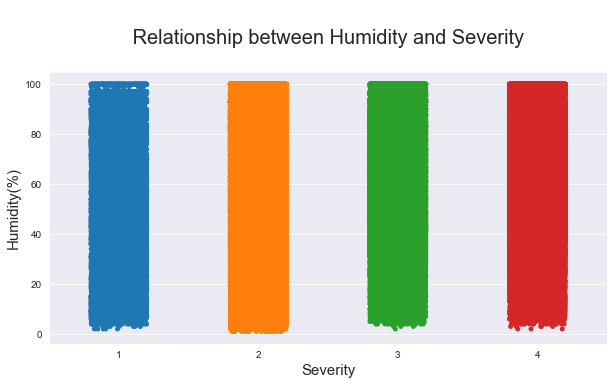

In [31]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Humidity and Severity \n', size=20)
plt.ylabel('\n Humidity(%) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Humidity(%)'],data=df,jitter=0.2)

Text(0.5, 6.799999999999994, '\n Humdity(%) \n')

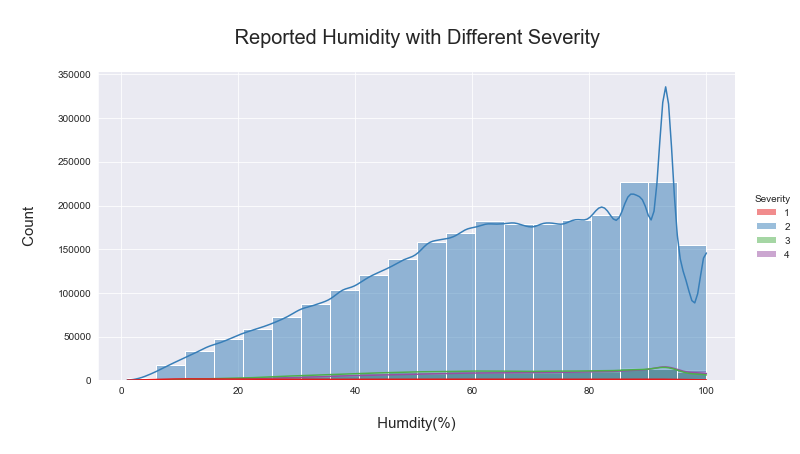

In [32]:
sns.displot(df, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Humidity with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Humdity(%) \n', fontsize=15)

Check out the relationship between visibility and severity.

<AxesSubplot:title={'center':'\n Relationship between Visibility and Severity \n'}, xlabel='Severity', ylabel='Visibility(mi)'>

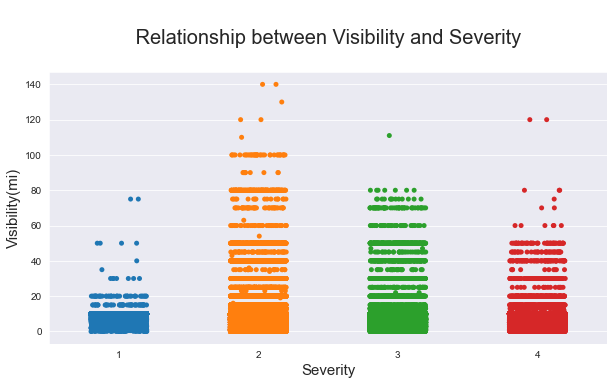

In [33]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Visibility and Severity \n', size=20)
plt.ylabel('\n Visibility(mi) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Visibility(mi)'],data=df,jitter=0.2)

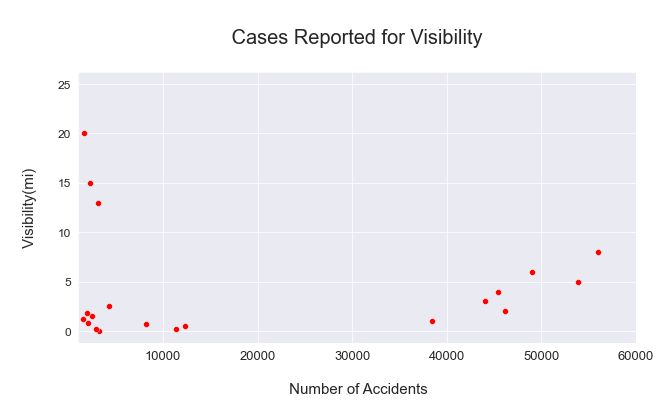

In [35]:
visibility = pd.DataFrame(df["Visibility(mi)"].value_counts()).reset_index().rename(columns={"index":"Visibility","Visibility(mi)":"Cases"})
# recreate a panda data frame
plt.figure(figsize=(10,5))
plt.title('\n Cases Reported for Visibility \n', size=20)
plt.ylabel('\n Visibility(mi) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(1000,60000)
a = sns.scatterplot(x=visibility.Cases,y=visibility.Visibility[visibility.Visibility<30],color='red')
plt.show()

Check out the relationship between precipitation and severity.

<AxesSubplot:title={'center':'\n Relationship between Precipitation and Severity \n'}, xlabel='Severity', ylabel='Precipitation(in)'>

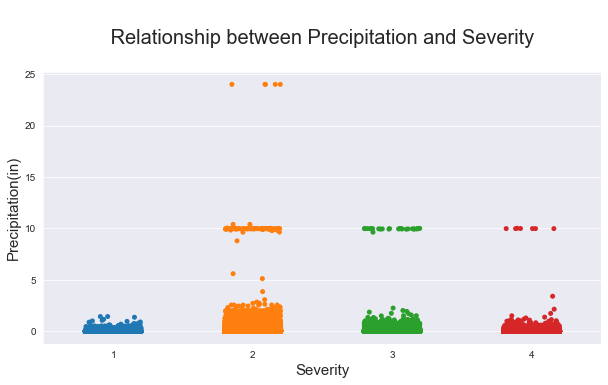

In [36]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Precipitation and Severity \n', size=20)
plt.ylabel('\n Precipitation(in) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Precipitation(in)'],data=df,jitter=0.2)

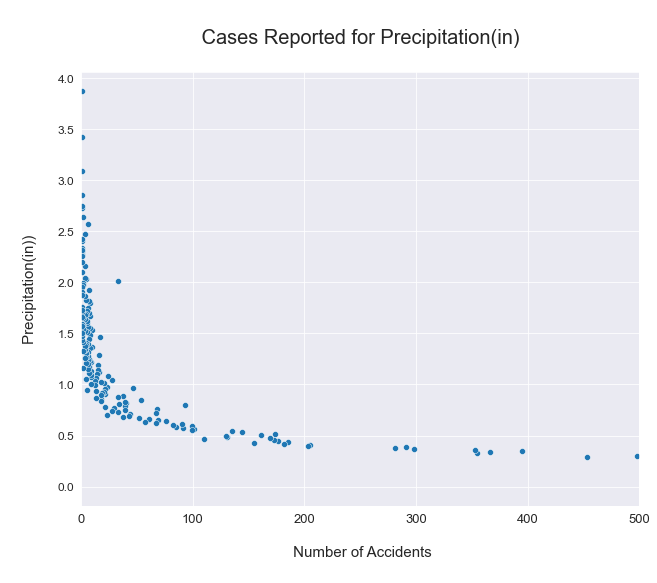

In [37]:
precipitation = pd.DataFrame(df["Precipitation(in)"].value_counts()).reset_index().rename(columns={"index":"Precipitation","Precipitation(in)":"Cases"})
plt.figure(figsize=(10,8))
plt.title('\n Cases Reported for Precipitation(in) \n', size=20)
plt.ylabel('\n Precipitation(in)) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0,500)
a = sns.scatterplot(x=precipitation.Cases,y=precipitation.Precipitation[precipitation.Precipitation<5])
plt.show()

Check out the relationship between windspeed and severity.

<AxesSubplot:title={'center':'\n Relationship between WindSpeed and Severity \n'}, xlabel='Severity', ylabel='Wind_Speed(mph)'>

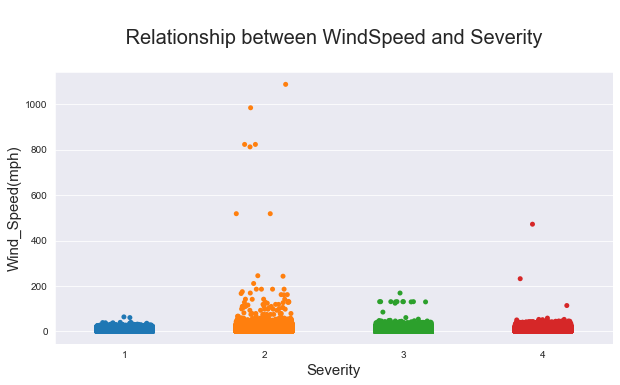

In [38]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between WindSpeed and Severity \n', size=20)
plt.ylabel('\n WindSpeed(mph) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Wind_Speed(mph)'],data=df,jitter=0.2)

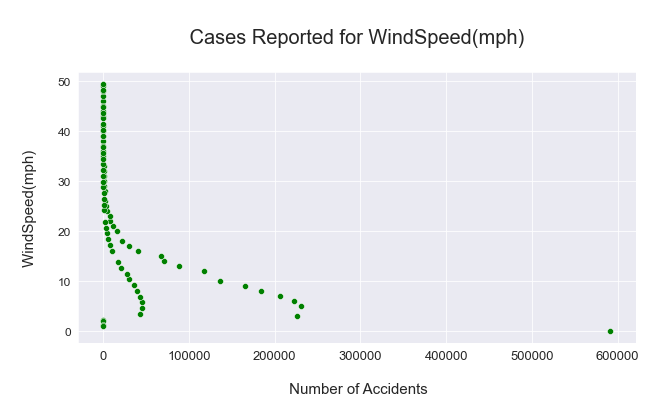

In [39]:
windspeed = pd.DataFrame(df["Wind_Speed(mph)"].value_counts()).reset_index().rename(columns={"index":"Wind_Speed","Wind_Speed(mph)":"Cases"})
plt.figure(figsize=(10,5))
plt.title('\n Cases Reported for WindSpeed(mph) \n', size=20)
plt.ylabel('\n WindSpeed(mph) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=windspeed.Cases,y=windspeed.Wind_Speed[windspeed.Wind_Speed<50],color='green')
plt.show()

I've just analyzed how different environmental factors might contribute to the number of accidents, how different environmental factors may influence the severity of the accidents.

I used pie chart, distplot, stripplot, jointplot, scatterplot and etc to see the relationship between these environmental factors, severity and number of accidents. 

We can see the final conclusions in the end.

### 2. Analysis about COVID-19 Influence

In [40]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845205, dtype: object

In [41]:
df.Start_Time= pd.to_datetime(df.Start_Time)

/Users/moyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'\n Distribution of Accidents Start Time \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

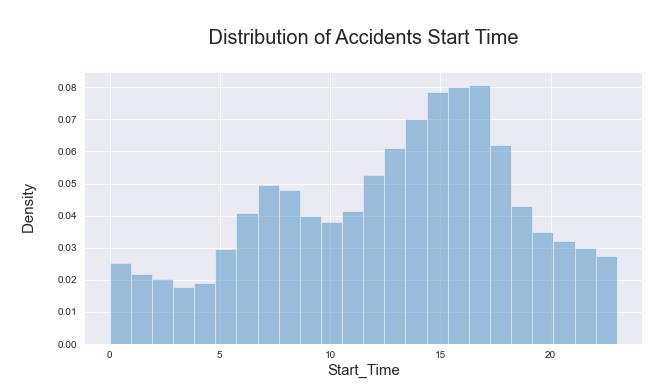

In [42]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Accidents Start Time \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24) \n', fontsize=15)
sns.distplot(df.Start_Time.dt.hour,bins =24,kde=False, norm_hist=True)

A high percentage of accidents occur between 15 to 18. I think that's because people are hurry to go back home. The next highest one is around 6 to 8. This might be due to people going to work in the morning.

<AxesSubplot:title={'center':'\n Distribution of Accidents Start Day \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

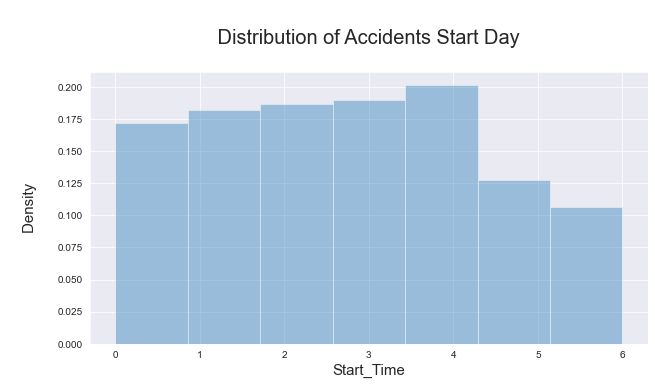

In [43]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Accidents Start Day \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Day) \n', fontsize=15)
sns.distplot(df.Start_Time.dt.dayofweek,bins =7,kde=False, norm_hist=True)

Number of accidents in weekdays are apparently higher than in weekends.

<AxesSubplot:title={'center':'\n Distribution of Sunday Accidents Start Hour \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

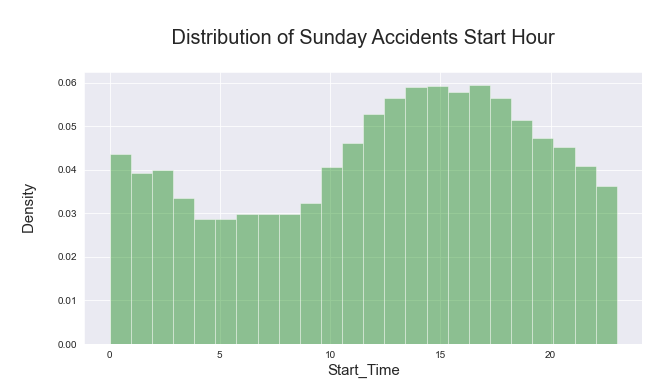

In [44]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Sunday Accidents Start Hour \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24)) \n', fontsize=15)
sundays_accidents= df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sundays_accidents.dt.hour,bins =24,kde=False, norm_hist=True, color='green')

<AxesSubplot:title={'center':'\n Distribution of Monday Accidents Start Hour \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

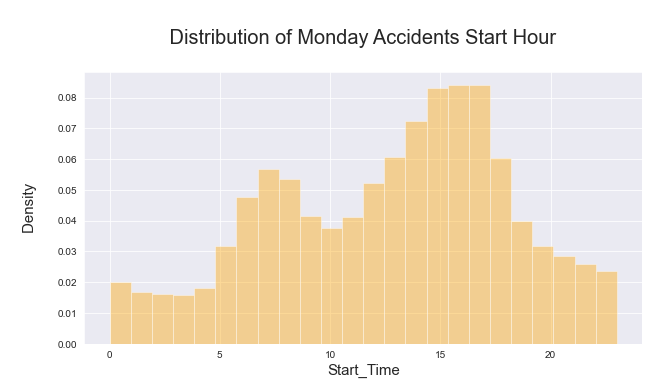

In [45]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Monday Accidents Start Hour \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24) \n', fontsize=15)
monday_accidents=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_accidents.dt.hour,bins=24,kde=False,norm_hist=True,color='orange')

This monday accidents start time distribution looks really similar to the overall distribution.

In [46]:
# collect each year's number of incidents to see the overall trend of year accidents
year_data= pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={"index":"Year","Start_Time":"Accident_Cases"})
# sns.distplot(year_data,bins =4,kde=False, norm_hist=True)
#plt.figure(figsize=(10,8))
year_data
#plt.title("Number of Reported Accidents (2016-2021) Trend")
#sns.lineplot(data=year_data["Accident_Cases"],label="yearly accidents")

,Year,Accident_Cases
0,2021,1511684
1,2020,625826
2,2019,258610
3,2017,163903
4,2018,163171
5,2016,122011


In [47]:
year_month = df["Start_Time"].groupby(df.Start_Time.dt.to_period("M")).agg('count').reset_index(name='Num_Accidents')
year_month ### Create the panda series for trend plot below and name or reset the value counts column as Num_Accidents

,Start_Time,Num_Accidents
0,2016-01,7
1,2016-02,546
2,2016-03,2398
3,2016-04,5904
4,2016-05,7147
...,...,...
67,2021-08,117706
68,2021-09,132465
69,2021-10,144462
70,2021-11,185356


<AxesSubplot:title={'center':'Number of Accidents of 2016-2021 by Months'}, xlabel='Month', ylabel='Number of Accidents'>

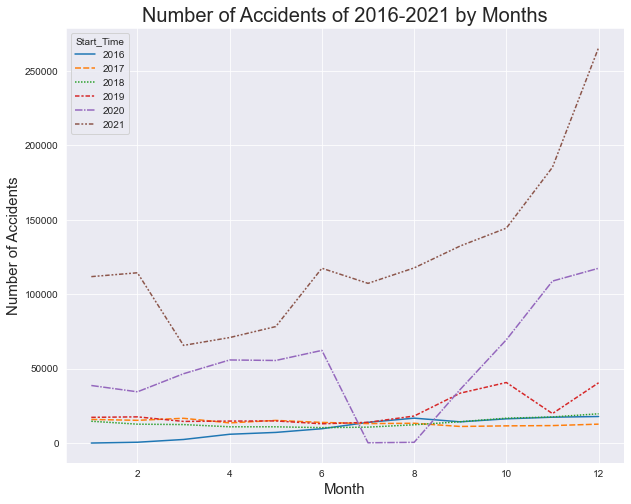

In [48]:
palette = sns.color_palette("tab10", 6)
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Number of Accidents",fontsize=15)
plt.title('Number of Accidents of 2016-2021 by Months',size=20)
sns.lineplot(data=year_month, x=year_month.Start_Time.dt.month, y=year_month.Num_Accidents, hue=year_month.Start_Time.dt.year,
             style=year_month.Start_Time.dt.year, palette=palette)

We can see there's a rising number of car accidents in 2020 and 2021.(Covid-19 period) But is it due to the environmental factors? We may need more data related to the number of positive cases, government policies etc. But we could check out the yearly environmental influence.

<AxesSubplot:title={'center':'Temperature Variation of 2016-2021 by Months'}, xlabel='Month', ylabel='Temperature level'>

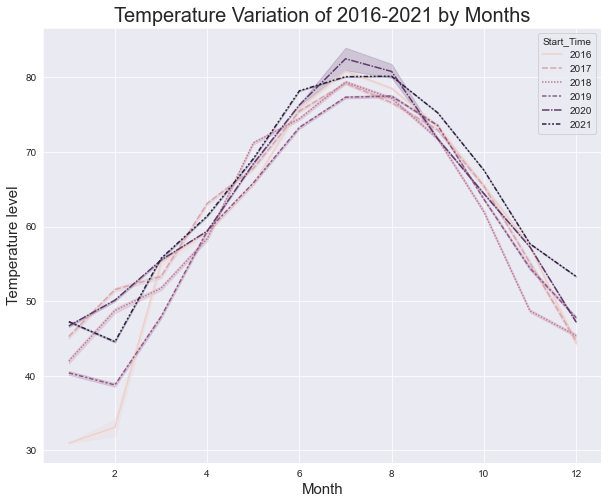

In [49]:
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Temperature level",fontsize=15)
plt.title('Temperature Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Temperature(F)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year)

<AxesSubplot:title={'center':'Humidity Variation of 2016-2021 by Months'}, xlabel='Month', ylabel='Humidity level'>

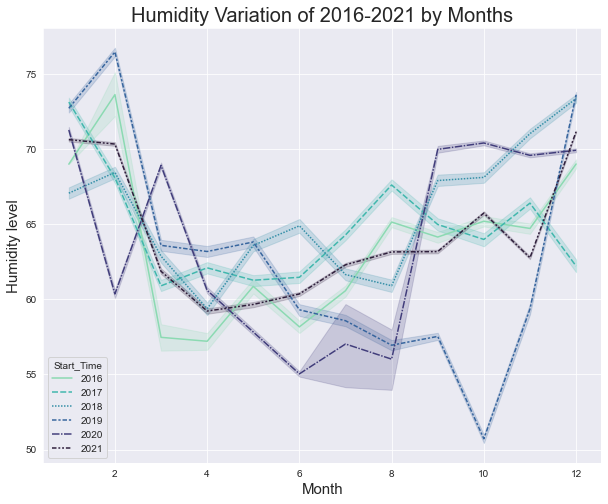

In [50]:
plt.figure(figsize = (10,8))
palette= sns.color_palette("mako_r",6)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Humidity level",fontsize=15)
plt.title('Humidity Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Humidity(%)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year,palette=palette)

<AxesSubplot:title={'center':'Precipitation Variation of 2016-2021 by Months'}, xlabel='Month', ylabel='Precipitation level'>

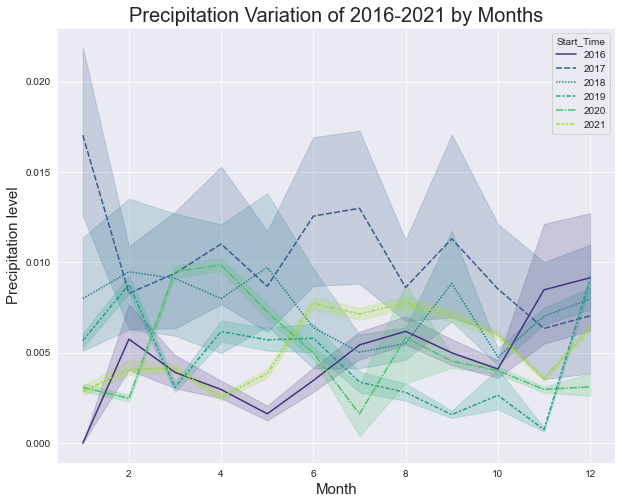

In [51]:
plt.figure(figsize = (10,8))
palette = sns.color_palette("viridis", 6)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Precipitation level",fontsize=15)
plt.title('Precipitation Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Precipitation(in)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year,palette=palette)

It seems like Precipitation level of every year varies drastically. 2017 has the overall highest precipitation level, whereas 2021 and 2020 have the relatively low precipitation level. 2016 has the middle level of precipitation.

We also want to know if the start time of the accidents has changed every year. During covid, the majority of jobs become work-from-home mode. Therefore, this new mode of working might have some impact on the number of accidents. Let's value count the number of accidents by start time per year in a new data frame.

In [52]:
start_time_acc= df.groupby([df.Start_Time.dt.year,df.Start_Time.dt.hour]).count()
start_time_acc.index.names=['year','hour']
start_time_acc = start_time_acc.reset_index()
start_time_acc

,year,hour,ID,Severity,Start_Time,Start_Lat,Start_Lng,City,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,2016,0,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
1,2016,1,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082
2,2016,2,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063
3,2016,3,1581,1581,1581,1581,1581,1581,1581,1581,1581,1581,1581
4,2016,4,1862,1862,1862,1862,1862,1862,1862,1862,1862,1862,1862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021,19,59957,59957,59957,59957,59957,59957,59957,59957,59957,59957,59957
140,2021,20,49736,49736,49736,49736,49736,49736,49736,49736,49736,49736,49736
141,2021,21,46967,46967,46967,46967,46967,46967,46967,46967,46967,46967,46967
142,2021,22,41641,41641,41641,41641,41641,41641,41641,41641,41641,41641,41641


<AxesSubplot:title={'center':'The Start Time of Accidents from 2016-2021 by Months'}, xlabel='Time: hour of Accidents', ylabel='Number of Accidents'>

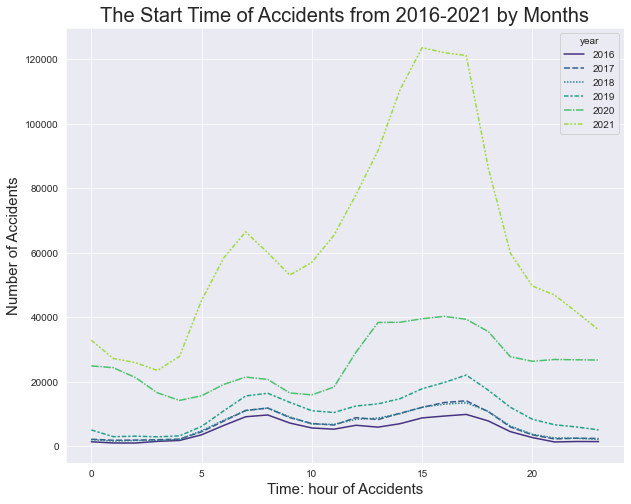

In [53]:
plt.figure(figsize = (10,8))
palette = sns.color_palette("viridis", 6)
plt.xlabel("Time: hour of Accidents",fontsize=15)
plt.ylabel("Number of Accidents",fontsize=15)
plt.title('The Start Time of Accidents from 2016-2021 by Months',size=20)
sns.lineplot(data=start_time_acc, x=start_time_acc['hour'], y=start_time_acc.ID,
             hue=start_time_acc.year,style=start_time_acc.year,palette=palette)

We can see no matter how we compare the accidents in 2021 with other years, the numbers are still much higher. Although 2021 is during COVID period and people can work from home, they still need to drive to grocery stores and have some trips. So we can say COVID-19 don't have much influence on the accident numbers.

### 3. Visulization in Map

In [54]:
import folium
from folium.plugins import HeatMap
sample_df= df.sample(int(0.001*len(df)))
lat_lng_pairs= list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))
map= folium.Map([38.552397, -96],zoom_start=6, min_zoom = 5, max_zoom = 13)
HeatMap(lat_lng_pairs).add_to(map)
map

From this map, we can see the east coast and west coast have really big accident numbers, especially New York,Florida and California. And the midwest region doesn't have many accidents recorded, as we have expected.

## Part4: Conclusion

#### 1. Environment Factor Influence
Temperature does not have much influence on the severity of the accident. Car accidents are most likely to happen at the temperature between 50F degree to 80F degree.
The number of car accidents increases as the humidity increases as we've expected. The majority of accidents due to humidty has a severity score of 2.
Severe car accidents are mostly accompanied with a low visibility (below 50 mi).Meanwhile, The least severe car accidents tend to have the poorest visibility (below 20 mi).
Precipitation and the number of accidents have a simple inverse relationship. The heavier the rain, the fewer the number of car accidents. Precipitation does not affect the severity of the accidents as much as the previous factors. 
Wind Speed affects the severity of the accidents almost equally. High wind speed, above 20mph, accompanies with 0 reported car accidents. Low wind speed, below 20 mph, accompanies with more car accidents as it decreases, not like what we expected before.


#### 2. COVID-19 period Influence
2021 has the most number of accidents at every hour. Nevertheless, this may not reflect the reality because 2021 has significantly more reported accidents than in 2016 or previous year. Interestingly, the pattern of each year looks almost identical and each year's line is just higher than the previous one.
During covid 19 period, the number of car accidents has increased significantly. Though people work from home, the number of accidents still keeps much higher than expectation.
And the number of car accidents happened at every hour has the same pattern as previous years though much higher.


#### 3. Overall Conclusion
Cold weathers does not have a strong relation with the number of traffics.
Low visibility (<5mi) has a strong relation with the number of accidents.
A high precipitation level does not cause more accidents.
A high wind speed does not cause more accident.
COVID-19 could have some impacts on the increased number of car accidents.